In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


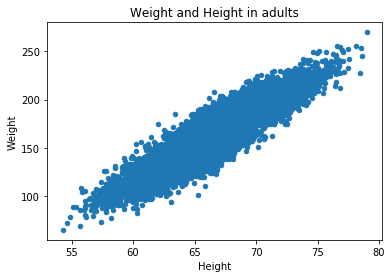

In [6]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

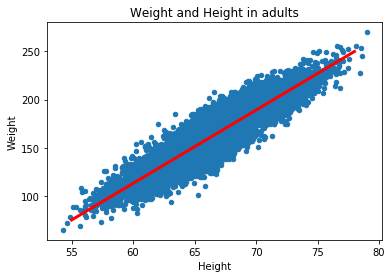

In [7]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [8]:
def line(x, w=0, b=0):
    return x * w + b

In [9]:
x = np.linspace(55, 80, 100)
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [10]:
yhat = line(x, w=0, b=0)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

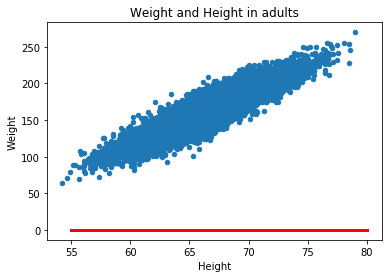

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [15]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [16]:
X

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [17]:
y_pred = line(X)

In [18]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [19]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

Text(0.5, 0, 'b')

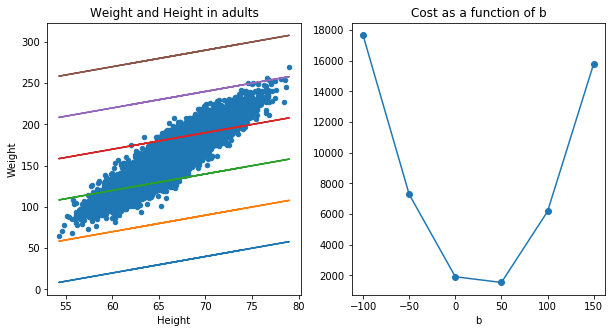

In [20]:
plt.figure(figsize=(10, 5))


ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

### Linear Regression with Keras ###

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [22]:
model = Sequential()

In [23]:
model.add(Dense(1, input_shape=(1,)))

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [26]:
model.fit(X, y_true, epochs=40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
10000/10000 [==============================] - 0s 41us/step - loss: 1207.8810
Epoch 2/40
10000/10000 [==============================] - 0s 22us/step - loss: 568.3585
Epoch 3/40
10000/10000 [==============================] - 0s 22us/step - loss: 524.6876
Epoch 4/40
10000/10000 [==============================] - 0s 23us/step - loss: 488.7850
Epoch 5/40
10000/10000 [==============================] - 0s 24us/step - loss: 441.0941
Epoch 6/40
10000/10000 [==============================] - 0s 23us/step - loss: 423.3493
Epoch 7/40
10000/10000 [==============================] - 0s 22us/step - loss: 375.8018
Epoch 8/40
10000/10000 [==============================] - 0s 22us/step - loss: 352.1118
Epoch 9/40
10000/10000 [==============================] - 0s 23us/step - loss: 317.5736
Epoch 10/40
10000/10000 [==============================] - 0s 23us/step - loss: 284.5636
Epoch 11/40
10000/10000 [==============================] - 0s 22us/ste

In [27]:
y_pred = model.predict(X)

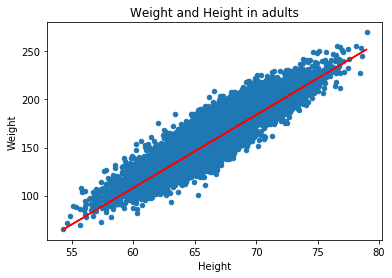

In [28]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [29]:
W, B = model.get_weights()

In [30]:
W

array([[7.599936]], dtype=float32)

In [31]:
B

array([-348.1463], dtype=float32)

### Model Performance

In [32]:
from sklearn.metrics import r2_score

In [33]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.829


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [36]:
len(X_train)

8000

In [37]:
len(X_test)

2000

In [38]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [39]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [40]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [41]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	162.5
The Mean Squared Error on the Test set is:	172.3


In [43]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.840
The R2 score on the Test set is:	0.841


### Classification

In [44]:
df = pd.read_csv('data/user_visit_duration.csv')

In [45]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


In [46]:
df.describe()

,Time (min),Buy
count,100.000000,100.000000
mean,1.849000,0.500000
std,1.073868,0.502519
min,0.000000,0.000000
25%,1.066667,0.000000
50%,1.858333,0.500000
75%,2.687500,1.000000
max,4.150000,1.000000


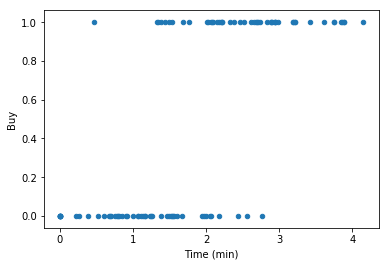

In [47]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [48]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [49]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [51]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 2ms/step - loss: 0.6174 - acc: 0.5800
Epoch 2/25
100/100 [==============================] - 0s 47us/step - loss: 0.5828 - acc: 0.6400
Epoch 3/25
100/100 [==============================] - 0s 43us/step - loss: 0.5592 - acc: 0.7200
Epoch 4/25
100/100 [==============================] - 0s 48us/step - loss: 0.5312 - acc: 0.7500
Epoch 5/25
100/100 [==============================] - 0s 44us/step - loss: 0.5046 - acc: 0.8000
Epoch 6/25
100/100 [==============================] - 0s 41us/step - loss: 0.4888 - acc: 0.8000
Epoch 7/25
100/100 [==============================] - 0s 42us/step - loss: 0.4938 - acc: 0.7500
Epoch 8/25
100/100 [==============================] - 0s 42us/step - loss: 0.4835 - acc: 0.8100
Epoch 9/25
100/100 [==============================] - 0s 48us/step - loss: 0.4713 - acc: 0.7900
Epoch 10/25
100/100 [==============================] - 0s 50us/step - loss: 0.4537 - acc: 0.8300
Epoch 11/25
100/100 [===================

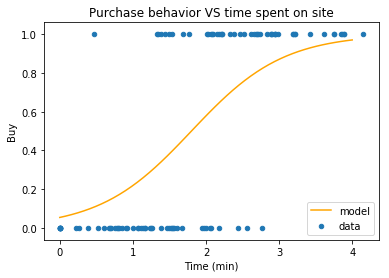

In [52]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [53]:
temp_class = model.predict(temp) > 0.5

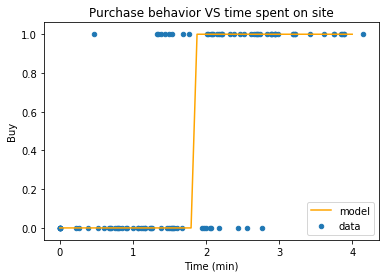

In [54]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [55]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.820


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [60]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [61]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [62]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.838
The test accuracy score is 0.800


### Cross Validation

In [63]:
from keras.wrappers.scikit_learn import KerasClassifier

In [64]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [65]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [66]:
from sklearn.model_selection import cross_val_score, KFold

In [67]:
cv = KFold(5, shuffle=True)

In [68]:
scores = cross_val_score(model, X, y, cv=cv)

In [69]:
scores

array([0.85000002, 0.94999999, 0.80000001, 0.60000002, 0.85000002])

In [70]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8100 ± 0.1158


### Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 9, 41]])

In [73]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [74]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,9,41


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [76]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.820
Recall:  	0.820
F1 Score:	0.820


In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        50
           1       0.82      0.82      0.82        50

   micro avg       0.82      0.82      0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

